# 2D meshing: xy cross-section

By supplying the argument `type="xy"` and a `z`-value, arbitrary planar cross-sections of the `Component` can be meshed.

Repeating last notebook's example:

2022-12-03 13:34:32.030 | INFO     | gdsfactory.config:<module>:48 - Load '/home/bilodeaus/Github/gdsfactory8_devsim/gdsfactory/gdsfactory' 6.3.5


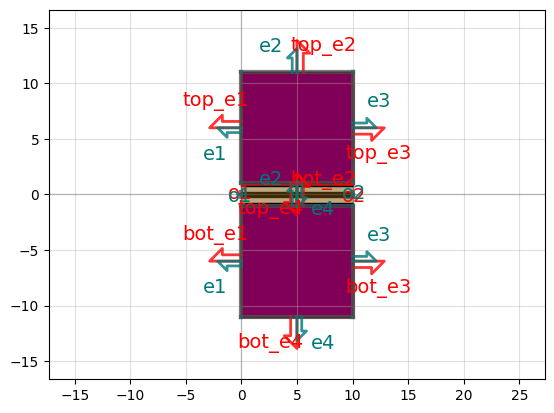

straight_pin_length10_taperNone: uid 71f3c62c, ports ['o1', 'o2', 'bot_e1', 'bot_e2', 'bot_e3', 'bot_e4', 'top_e1', 'top_e2', 'top_e3', 'top_e4'], references ['straight_1', 'via_stack_1', 'via_stack_2'], 0 polygons

In [1]:
import gdsfactory as gf
from gdsfactory.simulation.gmsh.mesh import create_physical_mesh
import meshio
import pyvista as pv

waveguide = gf.components.straight_pin(length=10, taper=None)
waveguide

In [2]:
from gdsfactory.tech import LayerMap, LayerStack, LayerLevel, get_layer_stack_generic

filtered_layerstack = LayerStack(
    layers={
        k: get_layer_stack_generic().layers[k]
        for k in (
            "slab90",
            "core",
            "via_contact",
        )
    }
)

In [3]:
filename = 'mesh'

def mesh_with_physicals(mesh, filename):
    mesh_from_file = meshio.read(f"{filename}.msh")
    triangle_mesh = create_physical_mesh(mesh_from_file, "triangle", prune_z=True)
    meshio.write(f"{filename}.xdmf", triangle_mesh)
    mesh = pv.read(f"{filename}.xdmf")
    return mesh

At `z=0.09` um, according to the layer stack above we should see polygons from all three layers:

In [4]:
filename = 'mesh'
mesh = waveguide.to_gmsh(type="xy", z=0.09, layer_stack=filtered_layerstack filename=f"{filename}.msh")
mesh = mesh_with_physicals(mesh, filename)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1162318329.py, line 2)

In [ ]:
plotter = pv.Plotter()
plotter.add_mesh(mesh, style='wireframe', show_scalar_bar=False)
plotter.show_grid()
plotter.camera_position = "xy"
plotter.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

At `z=0`, we expect only the core and slab:

In [ ]:
mesh = waveguide.to_gmsh(type="xy", z=0.0, layer_stack=filtered_layerstack, filename=f"{filename}.msh")
mesh = mesh_with_physicals(mesh, filename)

In [ ]:
plotter = pv.Plotter()
plotter.add_mesh(mesh, style='wireframe', show_scalar_bar=False)
plotter.show_grid()
plotter.camera_position = "xy"
plotter.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

At `z=1.0`, only the vias should appear:

In [ ]:
mesh = waveguide.to_gmsh(type="xy", z=1.0, layer_stack=filtered_layerstack, filename=f"{filename}.msh")
mesh = mesh_with_physicals(mesh, filename)

In [ ]:
plotter = pv.Plotter()
plotter.add_mesh(mesh, style='wireframe', show_scalar_bar=False)
plotter.show_grid()
plotter.camera_position = "xy"
plotter.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## Controlling meshing domain

Since arbitrary components can be meshed, we can use functions that return other components to modify the simulation domain, for instance `gdsfactory.geometry.trim`:

/home/bilodeaus/Github/gdsfactory8_devsim/gdsfactory/gdsfactory/component.py:1472: UserWarning: Component 'Unnamed_377c8a0a' contains 1 Unnamed cells
  warnings.warn(


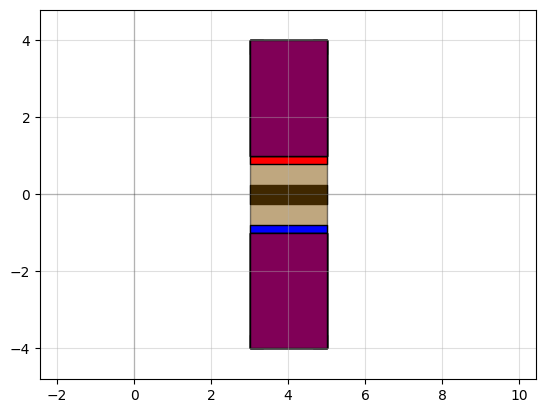

Unnamed_377c8a0a: uid 377c8a0a, ports [], references ['trim_1'], 0 polygons

In [ ]:
waveguide_trimmed = gf.Component()
waveguide_trimmed.add_ref(
    gf.geometry.trim(
        component=waveguide,
        domain=[[3, -4], [3, 4], [5, 4], [5, -4]],
    )
)

waveguide_trimmed

In [ ]:
mesh = waveguide_trimmed.to_gmsh(type="xy", z=0.09, layer_stack=filtered_layerstack, filename=f"{filename}.msh")
mesh = mesh_with_physicals(mesh, filename)

In [ ]:
plotter = pv.Plotter()
plotter.add_mesh(mesh, style='wireframe', show_scalar_bar=False)
plotter.show_grid()
plotter.camera_position = "xy"
plotter.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)